In [1]:
import pandas as pd
import mat4py
from mat4py import loadmat
import scipy
import numpy as np
from scipy.fft import fft, ifft, fftfreq
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
import os
# os.system('reset')

In [2]:
NoOfFiles = 8
ExpData = {}
ExpTime = {}
ExpDist = {}

In [3]:
for i in range(0,NoOfFiles):
    FileName = 'Si_0213_trans_'+str(i+1)+'.mat'
    StructName = 'Si_0213_trans_'+str(i+1)
    ExpData[i] = loadmat(FileName)
    ExpTime[i] = ExpData[i][StructName]['axisValues'][0]
    ExpDist[i] = ExpData[i][StructName]['axisValues'][1]

In [4]:
ExpNoYPosPoints = {}
ExpNoTimePoints = {}
# ExpSignalValues = {}
ExpAmpMatrix = {}
ExpAmpMatrixNorm = {}
ExpNoXPosPoints = NoOfFiles
ExpMaxAmpMatrix = np.empty(shape=(NoOfFiles,len(ExpDist[1])))

In [5]:
for i in range(0,ExpNoXPosPoints):
    ExpNoYPosPoints[i] = len(ExpDist[1])
    ExpNoTimePoints[i] = len(ExpTime[1])
    ExpAmpMatrix[i] = np.empty(shape=(ExpNoTimePoints[i],ExpNoYPosPoints[i]))
    ExpAmpMatrixNorm[i] = np.empty(shape=(ExpNoTimePoints[i],ExpNoYPosPoints[i]))
    for j in range(0,ExpNoYPosPoints[i]):
        ExpSignalValues = list()
        for k in range(0,ExpNoTimePoints[i]):
            ExpSignalValues.append(ExpData[i]['Si_0213_trans_'+str(i+1)]['data'][k][j])
        ExpAmpMatrix[i][:,j] = ExpSignalValues
        MaxAmpAbs = max(abs(v) for v in ExpSignalValues)
        Normalized = [x / MaxAmpAbs for x in ExpSignalValues]
        ExpAmpMatrixNorm[i][:,j] = Normalized
        ExpMaxAmpMatrix[i,j] = MaxAmpAbs
        ExpSignalValues = []

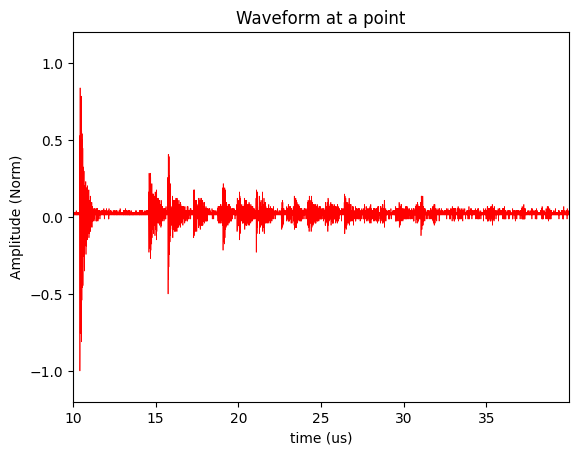

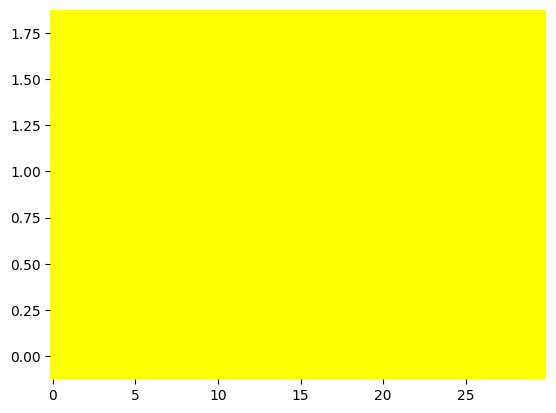

In [6]:
# SAMPLE OF TIME SIGNAL OF A POINT (CHOOSE POINT INDEX 0-159)
PointToPlot = 2
plt.plot(ExpTime[PointToPlot],ExpAmpMatrixNorm[PointToPlot][:,PointToPlot],linewidth=0.5,color='r')
plt.xlim([min(ExpTime[0]),max(ExpTime[0])])
plt.ylim([-1.2,1.2])
plt.title("Waveform at a point")
plt.xlabel("time (us)")
plt.ylabel("Amplitude (Norm)")

SignalIntDist = ExpMaxAmpMatrix
xAxis = [0,0.25,0.5,0.75,1.00,1.25,1.50,1.75]
fig, ax = plt.subplots()
ax.pcolormesh(ExpDist[0], xAxis, SignalIntDist,
              vmin=0.01, vmax=0.1, cmap='autumn', shading='auto')
ax.set_frame_on(False)